Species = Glutamic_acid_cytosol, Arginine_cytosol, Ornithine_cytosol, Spermine_cytosol, Putrescine_cytosol, Agmatine_cytosol, Spermidine_cytosol, Arg2_enzyme_cytosol, AsADC_enzyme_cytosol, speB_enzyme_cytosol, Car1_enzyme_cytosol, Spe1_enzyme_cytosol, Fms1_enzyme_cytosol
Reactions = [
	Glutamic_acid+Arg2_enzyme --> Arginine
	Arginine+AsADC_enzyme --> Agmatine
	Agmatine+speB_enzyme --> Putrescine
	Arginine+Car1_enzyme --> Ornithine
	Ornithine+Spe1_enzyme --> Putrescine
	Spermine+Fms1_enzyme --> Spermidine
	Spermidine+Fms1_enzyme --> Putrescine
]
MODULE 1: PUTRESCINE BIOSYNTHESIS
Species = Glutamic_acid_cytosol, Arginine_cytosol, Ornithine_cytosol, Spermine_cytosol, Putrescine_cytosol, Agmatine_cytosol, Spermidine_cytosol, Arg2_enzyme_cytosol, AsADC_enzyme_cytosol, speB_enzyme_cytosol, Car1_enzyme_cytosol, Spe1_enzyme_cytosol, Fms1_enzyme_cytosol
Reactions = [
	First and Second Biochemical Route: Glumatic_Acid → Putrescine
	Glutamic_acid+Arg2_enzyme --> Arginine

	Parallel Reactions: Pat

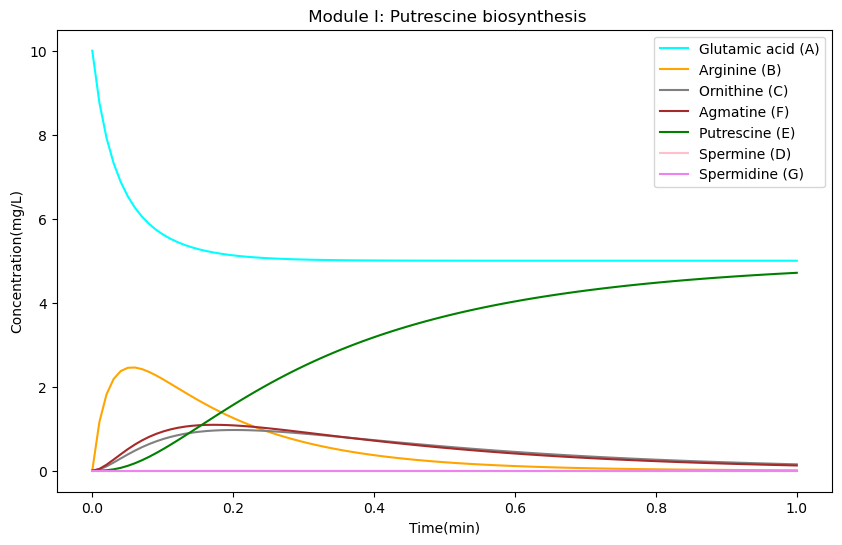

In [102]:
# Module 1: Putrescine Biosynthesis Pathway
# This module describes the biosynthesis of putrescine from glutamic acid through multiple biochemical routes

from biocrnpyler import Species, Reaction, ChemicalReactionNetwork
# Define compartments
cytosol = Compartment("cytosol")
ER = Compartment("ER")
peroxisome = Compartment("peroxisome")
vacuole = Compartment("vacuole")

# Define species 
A = Species("Glutamic_acid", compartment=cytosol)
B = Species("Arginine", compartment=cytosol)
C = Species("Ornithine", compartment=cytosol)
D = Species("Spermine", compartment=cytosol)
E = Species("Putrescine", compartment=cytosol)
F = Species("Agmatine", compartment=cytosol)
G = Species("Spermidine", compartment=cytosol)

# Enzymes (cytosolic)
Arg2  = Species("Arg2_enzyme", compartment=cytosol)
AsADC = Species("AsADC_enzyme", compartment=cytosol)
speB  = Species("speB_enzyme", compartment=cytosol)
Car1  = Species("Car1_enzyme", compartment=cytosol)
Spe1  = Species("Spe1_enzyme", compartment=cytosol)
Fms1  = Species("Fms1_enzyme", compartment=cytosol) 


# Reaction rates
k1 = 3.0
k2 = 1.4
k3 = 1.0 
k4 = 1.0

# Reactions 

# Reaction from Glutamic acid(A)→ Arginine(B) via Arg2
R1_module1 = Reaction.from_massaction([A, Arg2], [B], k_forward=k1)

# Parallel Path 1: Arginine(B) → Agmatine(F) via AsADC / Agamatine(F) → Putrescine (E) via SpeB
R2_module1 = Reaction.from_massaction([B, AsADC], [F], k_forward=k2)
R3_module1 = Reaction.from_massaction([F, speB], [E], k_forward=k2)

# Parallel Path 2: Arginine(B) → Ornithine(C) via Car1/ Ornithine(C) → Putrescine (E) via Spe1
R4_module1 = Reaction.from_massaction([B, Car1], [C], k_forward=k3)
R5_module1 = Reaction.from_massaction([C, Spe1], [E], k_forward=k3)

# 3rd Biochemical Route: Spermine(D) → Spermidine(G) → Putrescine (E)
R6_module1 = Reaction.from_massaction([D, Fms1,], [G], k_forward=k4)
R7_module1 = Reaction.from_massaction([G, Fms1,], [E], k_forward=k4)

# Create CRN
CRN = ChemicalReactionNetwork(species=[A, B, C, D, E, F, G, Arg2, AsADC, speB, Car1, Spe1, Fms1], 
reactions=[R1_module1, R2_module1, R3_module1, R4_module1, R5_module1, R6_module1, R7_module1])

print(CRN)

# Custom output with parallel reaction labeling
print ("MODULE 1: PUTRESCINE BIOSYNTHESIS")
print("Species = " + ", ".join([str(s) for s in CRN.species]))
print("Reactions = [")
print("\tFirst and Second Biochemical Route: Glumatic_Acid → Putrescine")
print(f"\t{R1_module1}")  # Glutamic_acid + Arg2_enzyme --> Arginine

#Blank Line
print()

# Parallel Path 1
print("\tParallel Reactions: Path 1 - Arginine → Agmatine → Putrescine")
print(f"\t{R2_module1}")  # Arginine + AsADC_enzyme --> Agmatine
print(f"\t{R3_module1}")  # Agmatine + speB_enzyme --> Putrescine

#Blank Line
print()

# Parallel Path 2
print("\tParallel Reactions: Path 2 - Arginine → Ornithine → Putrescine")
print(f"\t{R4_module1}")  # Arginine + Car1_enzyme --> Ornithine
print(f"\t{R5_module1}")  # Ornithine + Spe1_enzyme --> Putrescine

#Blank Line
print()

# Third Biochemical Route
print("\tThird Biochemical Route: Spermine → Spermidine → Putrescine")
print(f"\t{R6_module1}")  # Spermine + Fms1_enzyme --> Spermidine
print(f"\t{R7_module1}")  # Spermidine + Fms1_enzyme --> Putrescine
print("]")
# Simulate and plot
CRN.write_sbml_file("Module1.xml") 
try:
    import bioscrape
    import numpy as np
    import pylab as plt
    import pandas as pd

    # Correct initial conditions
    x0 ={
    "Glutamic_acid_cytosol": 10,
    "Arginine_cytosol": 0,
    "Ornithine_cytosol": 0,
    "Spermine_cytosol": 0,
    "Putrescine_cytosol": 0,
    "Agmatine_cytosol": 0,
    "Spermidine_cytosol": 0,
    "Arg2_enzyme_cytosol": 5,
    "AsADC_enzyme_cytosol": 5,
    "speB_enzyme_cytosol": 5,
    "Car1_enzyme_cytosol": 5,
    "Spe1_enzyme_cytosol": 5,
    "Fms1_enzyme_cytosol": 5 }
    timepoints = np.linspace(0, 1, 100)

# Run the simulation
    R = CRN.simulate_with_bioscrape_via_sbml(timepoints=timepoints, initial_condition_dict=x0)
#Plot results
    plt.figure(figsize=(10, 6))
    plt.plot(R['time'], R["Glutamic_acid_cytosol"], label= "Glutamic acid (A)", color= "cyan" )
    plt.plot(R['time'], R["Arginine_cytosol"], label="Arginine (B)", color = "orange")
    plt.plot(R['time'], R["Ornithine_cytosol"], label="Ornithine (C)", color= "gray")
    plt.plot(R['time'], R["Agmatine_cytosol"], label="Agmatine (F)", color= "brown")
    plt.plot(R['time'], R["Putrescine_cytosol"], label="Putrescine (E)", color= "green")
    plt.plot(R['time'], R["Spermine_cytosol"], label="Spermine (D)", color= "pink")
    plt.plot(R['time'], R["Spermidine_cytosol"], label="Spermidine (G)", color= "violet")
    plt.legend()
    plt.xlabel("Time(min)")
    plt.ylabel("Concentration(mg/L)")
    plt.title(" Module I: Putrescine biosynthesis")
except ModuleNotFoundError:
    print("Plotting Modules not installed.")




Species = Putrescine_cytosol, N_methylputrescine_cytosol, Methylaminobutanal_cytosol, N_Methyl_pyrrolinium_cytosol, Pyrrolidinyl_oxobutanoic_acid_cytosol, Tropinone_cytosol, Tropine_cytosol, AbPMT1_DsPMT1_enzyme_cytosol, DmMPO1C_PTS1_enzyme_peroxisome, AbPYKS_enzyme_and_2x_malonyl_CoA_molecules_cytosol, AbCYP82M3_AtATR1_enzyme_ER, DsTR1_enzyme_cytosol
Reactions = [
	Putrescine+AbPMT1_DsPMT1_enzyme --> N_methylputrescine
	N_methylputrescine+DmMPO1C_PTS1_enzyme --> Methylaminobutanal
	Methylaminobutanal --> N_Methyl_pyrrolinium
	N_Methyl_pyrrolinium+AbPYKS_enzyme_and_2x_malonyl_CoA_molecules --> Pyrrolidinyl_oxobutanoic_acid
	Pyrrolidinyl_oxobutanoic_acid+AbCYP82M3_AtATR1_enzyme --> Tropinone
	Tropinone+DsTR1_enzyme --> Tropine
]
MODULE 2: TROPINE BIOSYNTHESIS
Species = Putrescine_cytosol, N_methylputrescine_cytosol, Methylaminobutanal_cytosol, N_Methyl_pyrrolinium_cytosol, Pyrrolidinyl_oxobutanoic_acid_cytosol, Tropinone_cytosol, Tropine_cytosol, AbPMT1_DsPMT1_enzyme_cytosol, DmMPO1C_PT

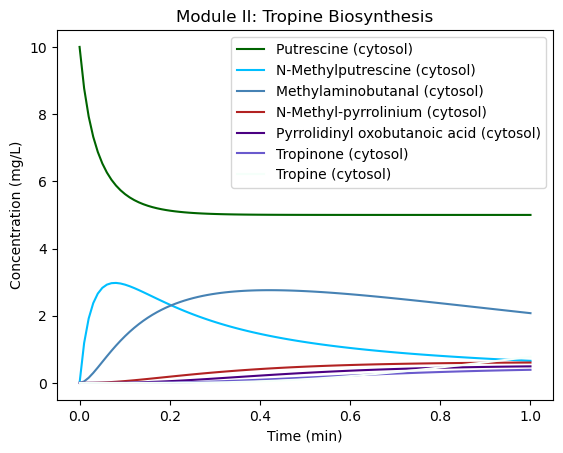

In [103]:
# Module II:Tropine biosynthesis

from biocrnpyler import *
# Define compartments
cytosol = Compartment("cytosol")
peroxisome = Compartment("peroxisome")
# Define species
AA = E
BB = Species("N_methylputrescine", compartment=cytosol)
CC = Species("Methylaminobutanal", compartment=cytosol)
DD = Species("N_Methyl_pyrrolinium", compartment=cytosol)
EE = Species("Pyrrolidinyl_oxobutanoic_acid", compartment=cytosol)
FF = Species("Tropinone",compartment=cytosol)
GG = Species("Tropine",compartment= cytosol)

# Enzymes
AbPMT1_DsPMT1= Species("AbPMT1_DsPMT1_enzyme", compartment=cytosol)
DmMPO1C = Species("DmMPO1C_PTS1_enzyme", compartment=peroxisome)
AbPYKS = Species("AbPYKS_enzyme_and_2x_malonyl_CoA_molecules",compartment= cytosol)
AbCYP82M3_AtATR1 = Species("AbCYP82M3_AtATR1_enzyme",compartment= ER) 
DsTR1 = Species("DsTR1_enzyme",compartment= cytosol) 


# Reaction rates
k1 = 3.0
k2 = 1.4
k3 = 1.0 
k4 = 1.0
k5 = 1.0
k6=  1.0

# Step 1: Putrescine (AA) → N-Methylputrescine (BB) via AbPMT1,DsPMT1
R1_module2= Reaction.from_massaction([AA, AbPMT1_DsPMT1 ], [BB], k_forward=k1)

# Step 2: N-methylputrescine(BB) → 4-Methylaminobutanal (CC) via DmMPO1ΔC_PTS1 (This step occurs in the Peroxisome)
R2_module2 = Reaction.from_massaction([BB, DmMPO1C], [CC], k_forward=k2)

# Step 3: 4-Methylaminobutanal(CC) → N-Methyl-Δ1-pyrrolinium (DD) (Reaction occurs spontaneously)
R3_module2 = Reaction.from_massaction([CC], [DD], k_forward=k3)

# Step 4: N-Methyl-Δ1-pyrrolinium(DD)→ 4-(1-Methyl-2-pyrrodinyl)-3-oxobutanoic acids (EE) 
R4_module2 = Reaction.from_massaction([DD, AbPYKS], [EE], k_forward=k4)

#Step 5:  4-(1-Methyl-2-pyrrodinyl)-3-oxobutanoic acids (EE) → Tropinone (FF) this reaction (ring formation) occurs in the ER
R5_module2 = Reaction.from_massaction([EE,AbCYP82M3_AtATR1], [FF], k_forward=k5)

# Step 6:Tropinone(FF) → Tropine(GG)
R6_module2 = Reaction.from_massaction([FF, DsTR1], [GG], k_forward=k6)

# Create CRN
CRN = ChemicalReactionNetwork(species=[AA, BB, CC, DD, EE, FF, GG, AbPMT1_DsPMT1, DmMPO1C, AbPYKS, AbCYP82M3_AtATR1, DsTR1], reactions=[R1_module2, R2_module2, R3_module2, R4_module2, R5_module2, R6_module2])

print (CRN)

# Custom output with parallel reaction labeling
print ("MODULE 2: TROPINE BIOSYNTHESIS")
print("Species = " + ", ".join([str(s) for s in CRN.species]))
print("Reactions = [")
#Step 1
print("\tStep 1: Putrescine → N-Methylputrescine")
print(f"\t{R1_module2}")  

#Blank Line
print()

# Step 2
print("\tStep 2: N-methylputrescine → 4-Methylaminobutanal *Occurs in Peroxisome*")
print(f"\t{R2_module2}") 
#Blank Line
print()

# Step 3
print("\tStep 3: 4-Methylaminobutanal → N-Methyl-1-pyrrolinium (Spontaneous)")
print(f"\t{R3_module2}")  
#Blank Line
print()

# Step 4
print("\tStep 4: N-Methyl-1-pyrrolinium → 4-(1-Methyl-2-pyrrodinyl)-3-oxobutanoic acids" )
print(f"\t{R4_module2}")  

#Blank Line
print()

#Step 5
print("\tStep 5: 4-(1-Methyl-2-pyrrodinyl)-3-oxobutanoic acids → Tropinone")
print(f"\t{R5_module2}")

#Blank Line
print()

# Step 6
print("\tStep 6:Tropinone → Tropine")
print(f"\t{R6_module2}")  
print("]")

# Simulate and plot
try:
    import bioscrape
    import numpy as np
    import pylab as plt
    import pandas as pd
    # Initial conditions
    x0 = {
        "Putrescine_cytosol": 10,
        "N_methylputrescine_cytosol": 0,
        "Methylaminobutanal_cytosol": 0,
        "N_Methyl_pyrrolinium_cytosol": 0,
        "Pyrrolidinyl_oxobutanoic_acid_cytosol": 0,
        "Tropinone_cytosol": 0,
        "Tropine_cytosol": 0,
        "AbPMT1_DsPMT1_enzyme_cytosol": 5,
        "DmMPO1C_PTS1_enzyme_peroxisome": 5,
        "AbPYKS_enzyme_and_2x_malonyl_CoA_molecules_cytosol": 5,
        "AbCYP82M3_AtATR1_enzyme_ER": 5,
        "DsTR1_enzyme_cytosol": 5,
    }

    timepoints = np.linspace(0, 1, 100)
    R = CRN.simulate_with_bioscrape_via_sbml(timepoints=timepoints, initial_condition_dict=x0)

    # Plot results
    plt.plot(R["time"], R["Putrescine_cytosol"], label="Putrescine (cytosol)", color="darkgreen") 
    plt.plot(R["time"], R["N_methylputrescine_cytosol"], label="N-Methylputrescine (cytosol)",color="deepskyblue" )
    plt.plot(R["time"], R["Methylaminobutanal_cytosol"], label="Methylaminobutanal (cytosol)", color="steelblue")
    plt.plot(R["time"], R["N_Methyl_pyrrolinium_cytosol"], label="N-Methyl-pyrrolinium (cytosol)", color= "firebrick")
    plt.plot(R["time"], R["Pyrrolidinyl_oxobutanoic_acid_cytosol"], label="Pyrrolidinyl oxobutanoic acid (cytosol)", color="indigo")
    plt.plot(R["time"], R["Tropinone_cytosol"], label="Tropinone (cytosol)", color="slateblue")
    plt.plot(R["time"], R["Tropine_cytosol"], label="Tropine (cytosol)", color="mintcream")
    plt.xlabel("Time (min)")
    plt.ylabel("Concentration (mg/L)")
    plt.title("Module II: Tropine Biosynthesis")
    plt.legend(loc="best")
    plt.show()
except ModuleNotFoundError:
    print("Plotting Modules not installed.")


MODULE 3: PLA glucoside biosynthesis
Species = Phenylalanine_cytosol, Phenylpyruvic_acid_cytosol, Phenyllactic_acid_cytosol, Phenyllactic_acid_glucoside_cytosol, Aro_enzyme, WfPPR_enzyme, AbUGT_enzyme
Species(N = 7) = {
WfPPR_enzyme (@ 0),  Phenylpyruvic_acid (@ 0),  Phenyllactic_acid_glucoside (@ 0),  Phenyllactic_acid (@ 0),  Phenylalanine (@ 0),  Aro_enzyme (@ 0),  AbUGT_enzyme (@ 0),  
}

Reactions (3) = [
0. Phenylalanine+Aro_enzyme --> Phenylpyruvic_acid
 Kf=k_forward * Phenylalanine_cytosol * Aro_enzyme
  k_forward=1.0

1. Phenylpyruvic_acid+WfPPR_enzyme --> Phenyllactic_acid
 Kf=k_forward * Phenylpyruvic_acid_cytosol * WfPPR_enzyme
  k_forward=1.0

2. Phenyllactic_acid+AbUGT_enzyme --> Phenyllactic_acid_glucoside
 Kf=k_forward * Phenyllactic_acid_cytosol * AbUGT_enzyme
  k_forward=1.0

]


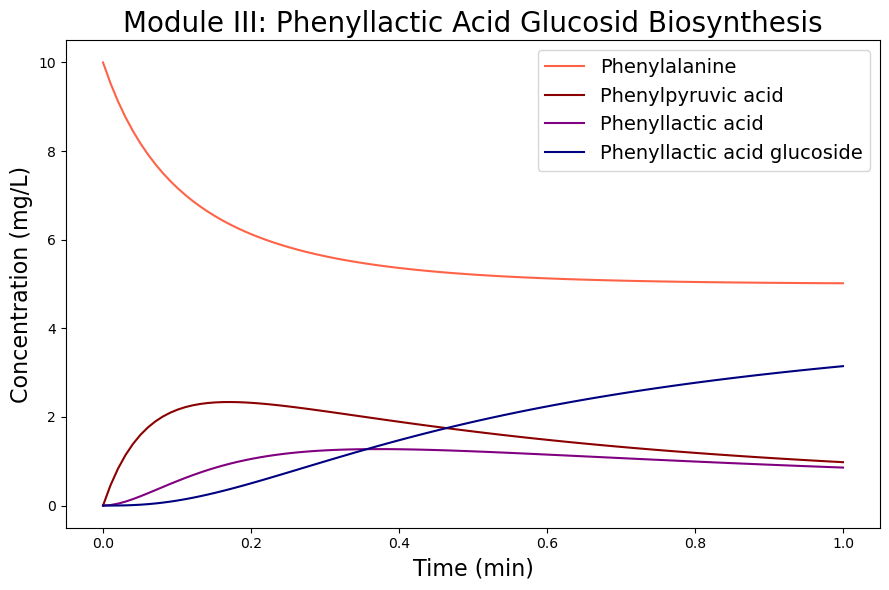

In [104]:
#Module III: PLA glucoside biosynthesis

from biocrnpyler import *

# Define species
Phe = Species("Phenylalanine", compartment=cytosol)
PPA = Species("Phenylpyruvic_acid",compartment=cytosol)
PLA = Species("Phenyllactic_acid", compartment=cytosol)
PLA_glucoside = Species("Phenyllactic_acid_glucoside", compartment=cytosol)

# Enzymes
Aro = Species("Aro_enzyme")  # Aro8/Aro9
WfPPR = Species("WfPPR_enzyme")
AbUGT = Species("AbUGT_enzyme")


# Reaction rates
k1 = 1.0
k2 = 1.0
k3 = 1.0 


# Reactions
#Phenylalanine → Phenylpyruvic acid via Aro8 / Aro9
R1_module3 = Reaction.from_massaction([Phe, Aro], [PPA], k_forward =k1)
#Phenylpyruvic acid → Phenyllactic acid (PLA) via WfPPR 
R2_module3 = Reaction.from_massaction([PPA, WfPPR], [PLA], k_forward = k2)
#Phenyllactic acid → Phenyllactic acid glucoside (PLA_glucoside) via AbUGT
R3_module3 = Reaction.from_massaction([PLA, AbUGT], [PLA_glucoside], k_forward = k3)


# Build CRN
species = [Phe, PPA, PLA, PLA_glucoside, Aro, WfPPR, AbUGT]
reactions = [R1_module3, R2_module3, R3_module3]

CRN = ChemicalReactionNetwork(species=species, reactions=reactions)
print ("MODULE 3: PLA glucoside biosynthesis")
print("Species = " + ", ".join([str(s) for s in CRN.species]))
print(CRN.pretty_print(show_materials = True, show_rates = True, show_attributes = True))

#Save CRN
CRN.write_sbml_file("Module3.xml")

# Simulate and plot
try:
    import bioscrape
    import numpy as np
    import pylab as plt
    import pandas as pd
    # Correct initial conditions
    x0 = {
    "Phenylalanine_cytosol": 10,
    "Phenylpyruvic_acid_cytosol": 0,
    "Phenyllactic_acid_cytosol": 0,
    "Phenyllactic_acid_glucoside_cytosol": 0,
    "Aro_enzyme": 5,
    "WfPPR_enzyme": 5,
    "AbUGT_enzyme": 5,
    }
    timepoints = np.linspace(0, 1, 100)
    # Run the simulation
    R = CRN.simulate_with_bioscrape_via_sbml(timepoints=timepoints, initial_condition_dict=x0)
    # Plot results
    plt.figure(figsize=(9, 6))
    plt.plot(R['time'], R["Phenylalanine_cytosol"], label="Phenylalanine", color="tomato")
    plt.plot(R['time'], R["Phenylpyruvic_acid_cytosol"], label="Phenylpyruvic acid", color= "darkred")
    plt.plot(R['time'], R["Phenyllactic_acid_cytosol"], label="Phenyllactic acid", color="purple")
    plt.plot(R['time'], R["Phenyllactic_acid_glucoside_cytosol"], label="Phenyllactic acid glucoside", color= "navy")
    plt.xlabel("Time (min)", fontsize=16)
    plt.ylabel("Concentration (mg/L)", fontsize=16)
    plt.legend(fontsize=14)
    plt.title("Module III: Phenyllactic Acid Glucosid Biosynthesis", fontsize=20)
    plt.tight_layout()
    plt.show()
except ModuleNotFoundError:
    print("Plotting Modules not installed.")
    

In [105]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# Get all named colors
colors = list(mcolors.CSS4_COLORS.keys())

# Print all color names
print(colors)

['aliceblue', 'antiquewhite', 'aqua', 'aquamarine', 'azure', 'beige', 'bisque', 'black', 'blanchedalmond', 'blue', 'blueviolet', 'brown', 'burlywood', 'cadetblue', 'chartreuse', 'chocolate', 'coral', 'cornflowerblue', 'cornsilk', 'crimson', 'cyan', 'darkblue', 'darkcyan', 'darkgoldenrod', 'darkgray', 'darkgreen', 'darkgrey', 'darkkhaki', 'darkmagenta', 'darkolivegreen', 'darkorange', 'darkorchid', 'darkred', 'darksalmon', 'darkseagreen', 'darkslateblue', 'darkslategray', 'darkslategrey', 'darkturquoise', 'darkviolet', 'deeppink', 'deepskyblue', 'dimgray', 'dimgrey', 'dodgerblue', 'firebrick', 'floralwhite', 'forestgreen', 'fuchsia', 'gainsboro', 'ghostwhite', 'gold', 'goldenrod', 'gray', 'green', 'greenyellow', 'grey', 'honeydew', 'hotpink', 'indianred', 'indigo', 'ivory', 'khaki', 'lavender', 'lavenderblush', 'lawngreen', 'lemonchiffon', 'lightblue', 'lightcoral', 'lightcyan', 'lightgoldenrodyellow', 'lightgray', 'lightgreen', 'lightgrey', 'lightpink', 'lightsalmon', 'lightseagreen', 

Module V: TA scaffold biosynthesis
Species = Tropine_cytosol, Phenyllactic_acid_glucoside_cytosol, Phenyllactic_acid_glucoside_vacuole, Tropine_vacuole, Littorine_vacuole, NtJAT1_transporter, DsRed_AbLS_enzyme
Species(N = 7) = {
Tropine (@ 0),  Tropine (@ 0),  Phenyllactic_acid_glucoside (@ 0),  Phenyllactic_acid_glucoside (@ 0),  NtJAT1_transporter (@ 0),  Littorine (@ 0),  DsRed_AbLS_enzyme (@ 0),  
}

Reactions (3) = [
0. Tropine+NtJAT1_transporter --> Tropine
 Kf=k_forward * Tropine_cytosol * NtJAT1_transporter
  k_forward=1.0

1. Phenyllactic_acid_glucoside --> Phenyllactic_acid_glucoside
 Kf=k_forward * Phenyllactic_acid_glucoside_cytosol
  k_forward=1.0

2. Phenyllactic_acid_glucoside+Tropine+DsRed_AbLS_enzyme --> Littorine
 Kf=k_forward * Phenyllactic_acid_glucoside_vacuole * Tropine_vacuole * DsRed_AbLS_enzyme
  k_forward=1.0

]


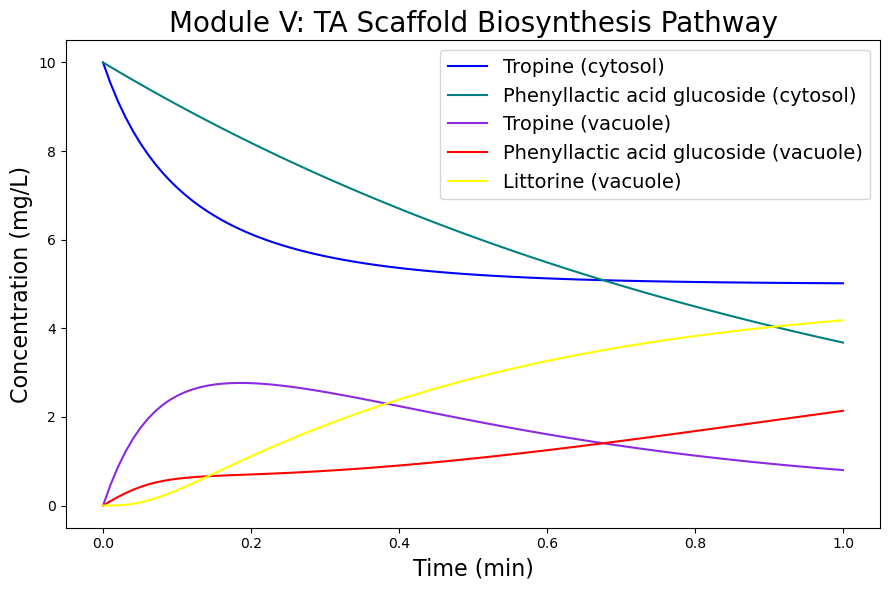

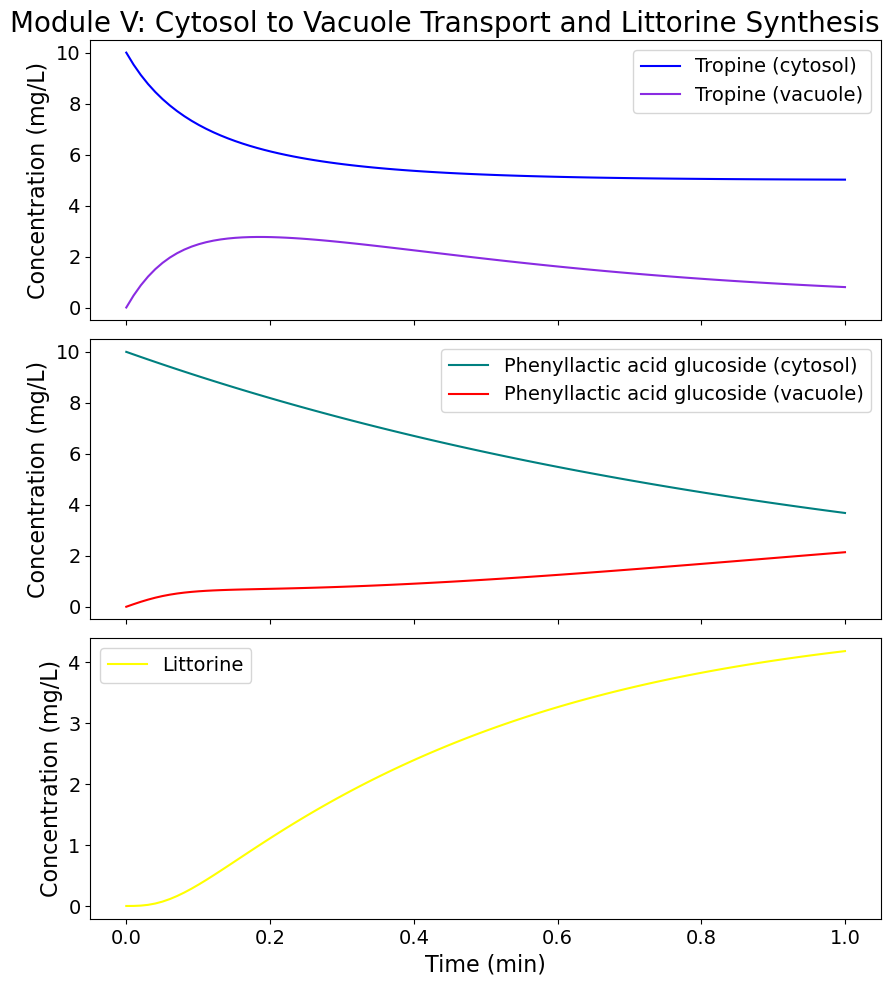

In [106]:
# Module V: TA scaffold biosynthesis

from biocrnpyler import Compartment

cytosol = "cytosol"
vacuole = "vacuole"

from biocrnpyler import *

#Species

Tropine_cyto = GG
Phenyllactic_acid_glucoside_cyto = PLA_glucoside
PLA_glucoside_vacu = Species("Phenyllactic_acid_glucoside", compartment=vacuole)# Acyl donor
Tropine_vacu = Species("Tropine", compartment=vacuole) # after transport and  acyl acceptor
Littorine_vacu = Species("Littorine", compartment= vacuole) # Product

## Transporter and enzyme
NtJAT1 = Species("NtJAT1_transporter")
DsRed_AbLS = Species("DsRed_AbLS_enzyme")

#Rates
k1 = 1.0
k2 = 1.0
k3 = 1.0

# Tropine → Tropine (catalyzed by NtJAT1)
R1_module5 = Reaction.from_massaction([Tropine_cyto, NtJAT1], [Tropine_vacu], k_forward=k1)
# PLA-glucoside_cyto → PLA-glucoside_vacu
R2_module5= Reaction.from_massaction([Phenyllactic_acid_glucoside_cyto], [PLA_glucoside_vacu], k_forward=k2)
# PLA-glucoside + Tropine → Littorine (catalyzed by AbLS_DsRed)
R3_module5 = Reaction.from_massaction([PLA_glucoside_vacu, Tropine_vacu, DsRed_AbLS], [Littorine_vacu], k_forward=k3)


# Assemble CRN
species = [Tropine_cyto, Phenyllactic_acid_glucoside_cyto,PLA_glucoside_vacu,Tropine_vacu, Littorine_vacu,NtJAT1, DsRed_AbLS]
reactions = [R1_module5, R2_module5,R3_module5]

CRN = ChemicalReactionNetwork(species=species, reactions=reactions)
print ("Module V: TA scaffold biosynthesis")
print("Species = " + ", ".join([str(s) for s in CRN.species]))
print(CRN.pretty_print(show_materials=True, show_rates=True, show_attributes=True))

# Save the CRN to an SBML file
CRN.write_sbml_file("Module5.xml")

# Simulate and plot
try:
    import bioscrape
    import numpy as np
    import pylab as plt
    # Correct initial conditions

    x0 = {
    "Tropine_cytosol": 10,
    "Phenyllactic_acid_glucoside_cytosol": 10,
    "Tropine_vacuole": 0,
    "Phenyllactic_acid_glucoside_vacuole": 0,
    "Littorine_vacuole": 0,
    "NtJAT1_transporter": 5,
    "DsRed_AbLS_enzyme": 5
    }


    timepoints = np.linspace(0, 1, 100)
    # Run the simulation
    R = CRN.simulate_with_bioscrape_via_sbml(timepoints=timepoints, initial_condition_dict=x0)
    # Plot results
    plt.figure(figsize=(9, 6))
    plt.plot(R['time'], R["Tropine_cytosol"], label="Tropine (cytosol)",color='blue')
    plt.plot(R['time'], R["Phenyllactic_acid_glucoside_cytosol"], label="Phenyllactic acid glucoside (cytosol)", color='teal')
    plt.plot(R['time'], R["Tropine_vacuole"], label="Tropine (vacuole)", color='blueviolet')
    plt.plot(R['time'], R["Phenyllactic_acid_glucoside_vacuole"], label="Phenyllactic acid glucoside (vacuole)",color='red')
    plt.plot(R['time'], R["Littorine_vacuole"], label="Littorine (vacuole)", color='yellow')
    plt.xlabel("Time (mim)")
    plt.ylabel("Concentration (mg/L)")
    plt.xlabel("Time (min)", fontsize=16)
    plt.ylabel("Concentration (mg/L)", fontsize=16)
    plt.legend(fontsize=14)
    plt.title("Module V: TA Scaffold Biosynthesis Pathway", fontsize=20)
    plt.tight_layout()
    plt.show()


    import matplotlib.pyplot as plt
    fig, axs = plt.subplots(3, 1, figsize=(9, 10), sharex=True)
    fig.suptitle("Module V: Cytosol to Vacuole Transport and Littorine Synthesis", fontsize=20, x=0.5, y=0.98)

    # Tropine: cytosol and vacuole
    axs[0].plot(R['time'], R["Tropine_cytosol"], label="Tropine (cytosol)", color='blue')
    axs[0].plot(R['time'], R["Tropine_vacuole"], label="Tropine (vacuole)", color= "blueviolet")
    axs[0].set_ylabel("Concentration (mg/L)", fontsize=16)
    axs[0].legend(loc='best', fontsize=14)
    axs[0].tick_params(labelsize=14)
    
    # Phenyllactic acid glucoside: cytosol and vacuole
    axs[1].plot(R['time'], R["Phenyllactic_acid_glucoside_cytosol"], label="Phenyllactic acid glucoside (cytosol)", color='Teal')
    axs[1].plot(R['time'], R["Phenyllactic_acid_glucoside_vacuole"], label="Phenyllactic acid glucoside (vacuole)", color='red')
    axs[1].set_ylabel("Concentration (mg/L)", fontsize=16)
    axs[1].legend(loc='best', fontsize=14)
    axs[1].tick_params(labelsize=14)

    # Littorine: vacuole
    axs[2].plot(R['time'], R["Littorine_vacuole"], label="Littorine", color='yellow')
    axs[2].set_ylabel("Concentration (mg/L)", fontsize=16)
    axs[2].set_xlabel("Time (min)", fontsize=16)
    axs[2].legend(loc='best', fontsize=14)
    axs[2].legend(loc='best')
    axs[2].tick_params(labelsize=14)
    plt.legend(fontsize=14)
    plt.tight_layout(pad=1.0)  # Reduces padding inside subplots
    plt.subplots_adjust(top=0.95)  # Bring title closer to plots
    plt.show()
except ModuleNotFoundError:
    print("Plotting Modules not installed.")


Module V: TA scaffold biosynthesis
Species = Tropine_cytosol, Phenyllactic_acid_glucoside_cytosol, Phenyllactic_acid_glucoside_vacuole, Tropine_vacuole, Littorine_vacuole, NtJAT1_transporter, DsRed_AbLS_enzyme
Species(N = 7) = {
Tropine (@ 0),  Tropine (@ 0),  Phenyllactic_acid_glucoside (@ 0),  Phenyllactic_acid_glucoside (@ 0),  NtJAT1_transporter (@ 0),  Littorine (@ 0),  DsRed_AbLS_enzyme (@ 0),  
}

Reactions (3) = [
0. Tropine+NtJAT1_transporter --> Tropine
 Kf=k_forward * Tropine_cytosol * NtJAT1_transporter
  k_forward=1.0

1. Phenyllactic_acid_glucoside --> Phenyllactic_acid_glucoside
 Kf=k_forward * Phenyllactic_acid_glucoside_cytosol
  k_forward=1.0

2. Phenyllactic_acid_glucoside+Tropine+DsRed_AbLS_enzyme --> Littorine
 Kf=k_forward * Phenyllactic_acid_glucoside_vacuole * Tropine_vacuole * DsRed_AbLS_enzyme
  k_forward=1.0

]


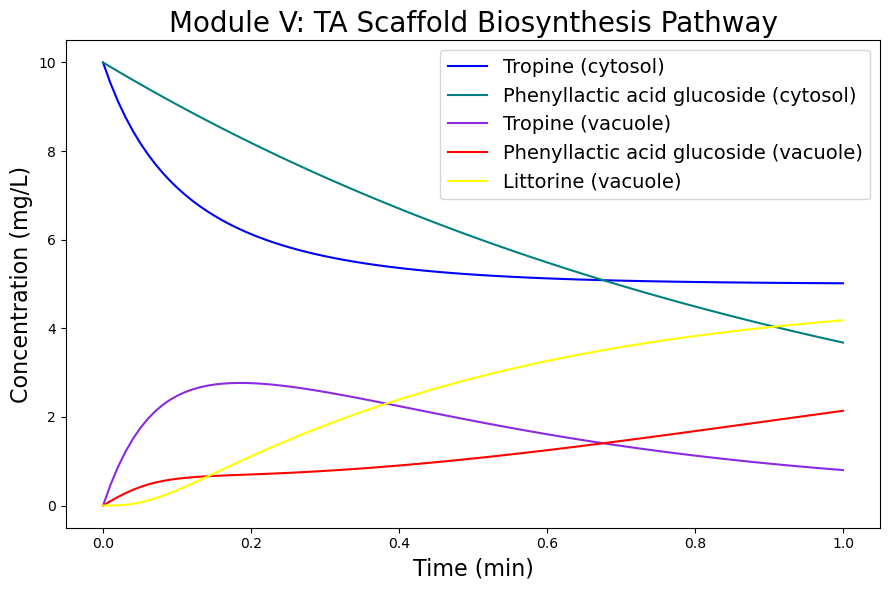

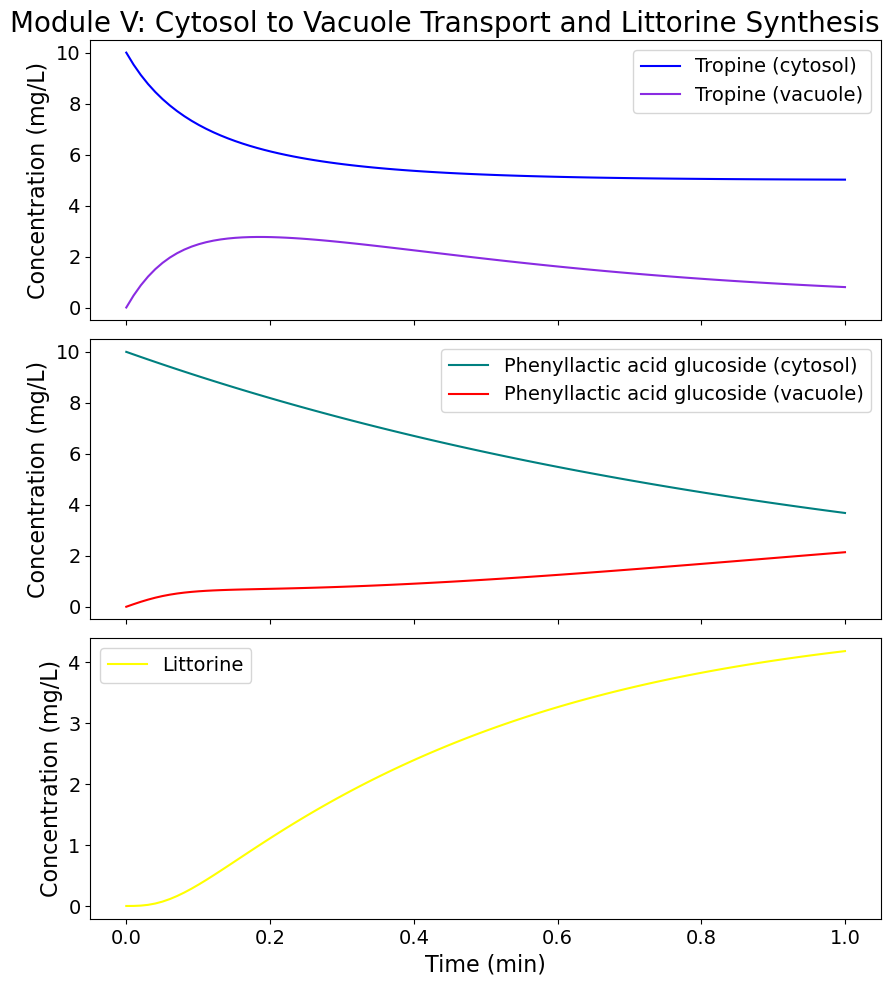

In [107]:
# Module V: TA scaffold biosynthesis

from biocrnpyler import Compartment

cytosol = "cytosol"
vacuole = "vacuole"

from biocrnpyler import *

#Species

Tropine_cyto = GG
Phenyllactic_acid_glucoside_cyto = PLA_glucoside
PLA_glucoside_vacu = Species("Phenyllactic_acid_glucoside", compartment=vacuole)# Acyl donor
Tropine_vacu = Species("Tropine", compartment=vacuole) # after transport and  acyl acceptor
Littorine_vacu = Species("Littorine", compartment= vacuole) # Product

## Transporter and enzyme
NtJAT1 = Species("NtJAT1_transporter")
DsRed_AbLS = Species("DsRed_AbLS_enzyme")

#Rates
k1 = 1.0
k2 = 1.0
k3 = 1.0

# Tropine → Tropine (catalyzed by NtJAT1)
R1_module5 = Reaction.from_massaction([Tropine_cyto, NtJAT1], [Tropine_vacu], k_forward=k1)
# PLA-glucoside_cyto → PLA-glucoside_vacu
R2_module5= Reaction.from_massaction([Phenyllactic_acid_glucoside_cyto], [PLA_glucoside_vacu], k_forward=k2)
# PLA-glucoside + Tropine → Littorine (catalyzed by AbLS_DsRed)
R3_module5 = Reaction.from_massaction([PLA_glucoside_vacu, Tropine_vacu, DsRed_AbLS], [Littorine_vacu], k_forward=k3)


# Assemble CRN
species = [Tropine_cyto, Phenyllactic_acid_glucoside_cyto,PLA_glucoside_vacu,Tropine_vacu, Littorine_vacu,NtJAT1, DsRed_AbLS]
reactions = [R1_module5, R2_module5,R3_module5]

CRN = ChemicalReactionNetwork(species=species, reactions=reactions)
print ("Module V: TA scaffold biosynthesis")
print("Species = " + ", ".join([str(s) for s in CRN.species]))
print(CRN.pretty_print(show_materials=True, show_rates=True, show_attributes=True))

# Save the CRN to an SBML file
CRN.write_sbml_file("Module5.xml")

# Simulate and plot
try:
    import bioscrape
    import numpy as np
    import pylab as plt
    # Correct initial conditions

    x0 = {
    "Tropine_cytosol": 10,
    "Phenyllactic_acid_glucoside_cytosol": 10,
    "Tropine_vacuole": 0,
    "Phenyllactic_acid_glucoside_vacuole": 0,
    "Littorine_vacuole": 0,
    "NtJAT1_transporter": 5,
    "DsRed_AbLS_enzyme": 5
    }


    timepoints = np.linspace(0, 1, 100)
    # Run the simulation
    R = CRN.simulate_with_bioscrape_via_sbml(timepoints=timepoints, initial_condition_dict=x0)
    # Plot results
    plt.figure(figsize=(9, 6))
    plt.plot(R['time'], R["Tropine_cytosol"], label="Tropine (cytosol)",color='blue')
    plt.plot(R['time'], R["Phenyllactic_acid_glucoside_cytosol"], label="Phenyllactic acid glucoside (cytosol)", color='teal')
    plt.plot(R['time'], R["Tropine_vacuole"], label="Tropine (vacuole)", color='blueviolet')
    plt.plot(R['time'], R["Phenyllactic_acid_glucoside_vacuole"], label="Phenyllactic acid glucoside (vacuole)",color='red')
    plt.plot(R['time'], R["Littorine_vacuole"], label="Littorine (vacuole)", color='yellow')
    plt.xlabel("Time (mim)")
    plt.ylabel("Concentration (mg/L)")
    plt.xlabel("Time (min)", fontsize=16)
    plt.ylabel("Concentration (mg/L)", fontsize=16)
    plt.legend(fontsize=14)
    plt.title("Module V: TA Scaffold Biosynthesis Pathway", fontsize=20)
    plt.tight_layout()
    plt.show()


    import matplotlib.pyplot as plt
    fig, axs = plt.subplots(3, 1, figsize=(9, 10), sharex=True)
    fig.suptitle("Module V: Cytosol to Vacuole Transport and Littorine Synthesis", fontsize=20)

    # Tropine: cytosol and vacuole
    axs[0].plot(R['time'], R["Tropine_cytosol"], label="Tropine (cytosol)", color='blue')
    axs[0].plot(R['time'], R["Tropine_vacuole"], label="Tropine (vacuole)", color= "blueviolet")
    axs[0].set_ylabel("Concentration (mg/L)", fontsize=16)
    axs[0].legend(loc='best', fontsize=14)
    axs[0].tick_params(labelsize=14)
    
    # Phenyllactic acid glucoside: cytosol and vacuole
    axs[1].plot(R['time'], R["Phenyllactic_acid_glucoside_cytosol"], label="Phenyllactic acid glucoside (cytosol)", color='Teal')
    axs[1].plot(R['time'], R["Phenyllactic_acid_glucoside_vacuole"], label="Phenyllactic acid glucoside (vacuole)", color='red')
    axs[1].set_ylabel("Concentration (mg/L)", fontsize=16)
    axs[1].legend(loc='best', fontsize=14)
    axs[1].tick_params(labelsize=14)

    # Littorine: vacuole
    axs[2].plot(R['time'], R["Littorine_vacuole"], label="Littorine", color='yellow')
    axs[2].set_ylabel("Concentration (mg/L)", fontsize=16)
    axs[2].set_xlabel("Time (min)", fontsize=16)
    axs[2].legend(loc='best', fontsize=14)
    axs[2].legend(loc='best')
    axs[2].tick_params(labelsize=14)
    plt.legend(fontsize=14)
    plt.tight_layout(pad=1.0)  # Reduces padding inside subplots
    plt.subplots_adjust(top=0.95)  # Bring title closer to plots
    plt.show()
except ModuleNotFoundError:
    print("Plotting Modules not installed.")


In [108]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# Get all named colors
colors = list(mcolors.CSS4_COLORS.keys())

# Print all color names
print(colors)

['aliceblue', 'antiquewhite', 'aqua', 'aquamarine', 'azure', 'beige', 'bisque', 'black', 'blanchedalmond', 'blue', 'blueviolet', 'brown', 'burlywood', 'cadetblue', 'chartreuse', 'chocolate', 'coral', 'cornflowerblue', 'cornsilk', 'crimson', 'cyan', 'darkblue', 'darkcyan', 'darkgoldenrod', 'darkgray', 'darkgreen', 'darkgrey', 'darkkhaki', 'darkmagenta', 'darkolivegreen', 'darkorange', 'darkorchid', 'darkred', 'darksalmon', 'darkseagreen', 'darkslateblue', 'darkslategray', 'darkslategrey', 'darkturquoise', 'darkviolet', 'deeppink', 'deepskyblue', 'dimgray', 'dimgrey', 'dodgerblue', 'firebrick', 'floralwhite', 'forestgreen', 'fuchsia', 'gainsboro', 'ghostwhite', 'gold', 'goldenrod', 'gray', 'green', 'greenyellow', 'grey', 'honeydew', 'hotpink', 'indianred', 'indigo', 'ivory', 'khaki', 'lavender', 'lavenderblush', 'lawngreen', 'lemonchiffon', 'lightblue', 'lightcoral', 'lightcyan', 'lightgoldenrodyellow', 'lightgray', 'lightgreen', 'lightgrey', 'lightpink', 'lightsalmon', 'lightseagreen', 

Module V: TA scaffold biosynthesis
Species = Tropine_cytosol, Phenyllactic_acid_glucoside_cytosol, Tropine_vacuole, Phenyllactic_acid_glucoside_vacuole, Littorine_vacuole, NtJAT1_transporter, DsRed_AbLS_enzyme
Species(N = 7) = {
Tropine (@ 0),  Tropine (@ 0),  Phenyllactic_acid_glucoside (@ 0),  Phenyllactic_acid_glucoside (@ 0),  NtJAT1_transporter (@ 0),  Littorine (@ 0),  DsRed_AbLS_enzyme (@ 0),  
}

Reactions (3) = [
0. Tropine+NtJAT1_transporter --> Tropine
 Kf=k_forward * Tropine_cytosol * NtJAT1_transporter
  k_forward=1.0

1. Phenyllactic_acid_glucoside --> Phenyllactic_acid_glucoside
 Kf=k_forward * Phenyllactic_acid_glucoside_cytosol
  k_forward=1.0

2. Phenyllactic_acid_glucoside+Tropine+DsRed_AbLS_enzyme --> Littorine
 Kf=k_forward * Phenyllactic_acid_glucoside_vacuole * Tropine_vacuole * DsRed_AbLS_enzyme
  k_forward=1.0

]


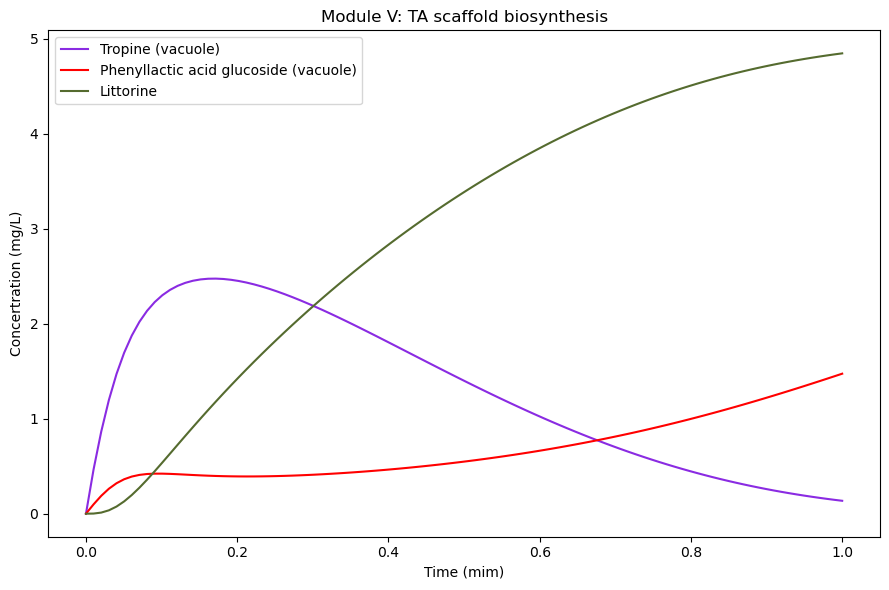

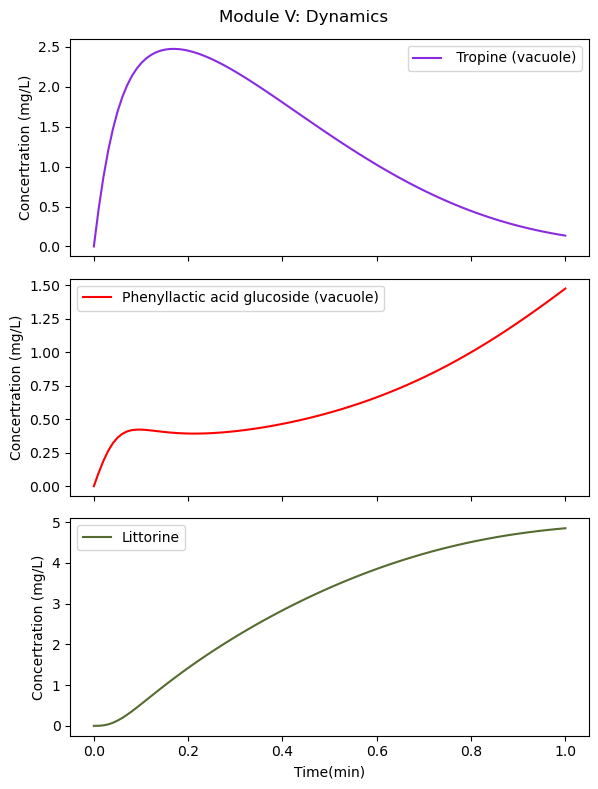

In [109]:
from biocrnpyler import *

# Define compartments
cytosol = "cytosol"
vacuole = "vacuole"

# === Species ===
Tropine_cyto = Species("Tropine", compartment=cytosol)
PLA_glucoside_cyto = Species("Phenyllactic_acid_glucoside", compartment=cytosol)

Tropine_vacu = Species("Tropine", compartment=vacuole)
PLA_glucoside_vacu = Species("Phenyllactic_acid_glucoside", compartment=vacuole)
Littorine_vacu = Species("Littorine", compartment=vacuole)

# Transporter and enzyme
NtJAT1 = Species("NtJAT1_transporter")
DsRed_AbLS = Species("DsRed_AbLS_enzyme")

# === Reactions ===
k1 = 1.0  # all rate constants

# Transport Tropine to vacuole
transport_tropine = Reaction.from_massaction([Tropine_cyto, NtJAT1], [Tropine_vacu], k_forward=k1)

# Transport PLA-glucoside to vacuole
transport_pla = Reaction.from_massaction ([PLA_glucoside_cyto], [PLA_glucoside_vacu], k_forward=k1)

# Littorine biosynthesis in vacuole
synthesis_littorine = Reaction.from_massaction( [PLA_glucoside_vacu, Tropine_vacu, DsRed_AbLS], [Littorine_vacu], k_forward=k1)

# === Chemical Reaction Network ===
species = [
    Tropine_cyto, PLA_glucoside_cyto,
    Tropine_vacu, PLA_glucoside_vacu, Littorine_vacu,
    NtJAT1, DsRed_AbLS
]
reactions = [transport_tropine, transport_pla, synthesis_littorine]

CRN = ChemicalReactionNetwork(species=species, reactions=reactions)

print("Module V: TA scaffold biosynthesis")
print("Species = " + ", ".join([str(s) for s in CRN.species]))
print(CRN.pretty_print(show_materials=True, show_rates=True, show_attributes=True))

# Write to SBML
CRN.write_sbml_file("Module5.xml")

# === Simulation ===
try:
    import bioscrape
    import numpy as np
    import pylab as plt

    # Initial conditions
    x0 = {
        "Tropine_cytosol":10,
        "Phenyllactic_acid_glucoside_cytosol": 10,
        "Tropine_vacuole": 0,
        "Phenyllactic_acid_glucoside_vacuole": 0,
        "Littorine_vacuole": 0,
        "NtJAT1_transporter": 5,
        "DsRed_AbLS_enzyme": 10
    }

    timepoints = np.linspace(0, 1, 100)
    R = CRN.simulate_with_bioscrape_via_sbml(timepoints=timepoints, initial_condition_dict=x0)

   # === Single Combined Plot ===
    plt.figure(figsize=(9, 6))
    plt.plot(R['time'], R["Tropine_vacuole"], label="Tropine (vacuole)", color='blueviolet')
    plt.plot(R['time'], R["Phenyllactic_acid_glucoside_vacuole"], label="Phenyllactic acid glucoside (vacuole)", color='red')
    plt.plot(R['time'], R["Littorine_vacuole"], label="Littorine", color='darkolivegreen')
    plt.xlabel("Time (mim)")
    plt.ylabel("Concertration (mg/L)")
    plt.title("Module V: TA scaffold biosynthesis")
    plt.legend()
    plt.tight_layout()
    plt.show()

    # === Plot as subplots ===
    fig, axs = plt.subplots(3, 1, figsize=(6, 8), sharex=True)

    axs[0].plot(R['time'], R["Tropine_vacuole"], label= " Tropine (vacuole)",color= "blueviolet")
    axs[0].set_ylabel("Concertration (mg/L)")
    axs[0].legend(loc='best')


    axs[1].plot(R['time'], R["Phenyllactic_acid_glucoside_vacuole"], label= "Phenyllactic acid glucoside (vacuole)", color='red')
    axs[1].set_ylabel("Concertration (mg/L)")
    axs[1].legend(loc='best')


    axs[2].plot(R['time'], R["Littorine_vacuole"], label= "Littorine", color='darkolivegreen')
    axs[2].set_ylabel("Concertration (mg/L)")
    axs[2].set_xlabel("Time(min)")
    axs[2].legend(loc='best')


    plt.suptitle("Module V: Dynamics")
    plt.tight_layout()
    plt.show()
    
except ModuleNotFoundError:
    print("bioscrape or plotting libraries not installed.")


Species = Littorine_cytosol, Hyoscyamine_aldehyde_ER, Hyoscyamine_cytosol, Scopolamine_cytosol, AbCYP80F1_ER, AtATR1_ER, DsHDH_cytosol, DsH6H_cytosol
Reactions = [
	Littorine --> Hyoscyamine_aldehyde
	Hyoscyamine_aldehyde --> Hyoscyamine
	Hyoscyamine --> Scopolamine
	Hyoscyamine_aldehyde <--> Hyoscyamine
]


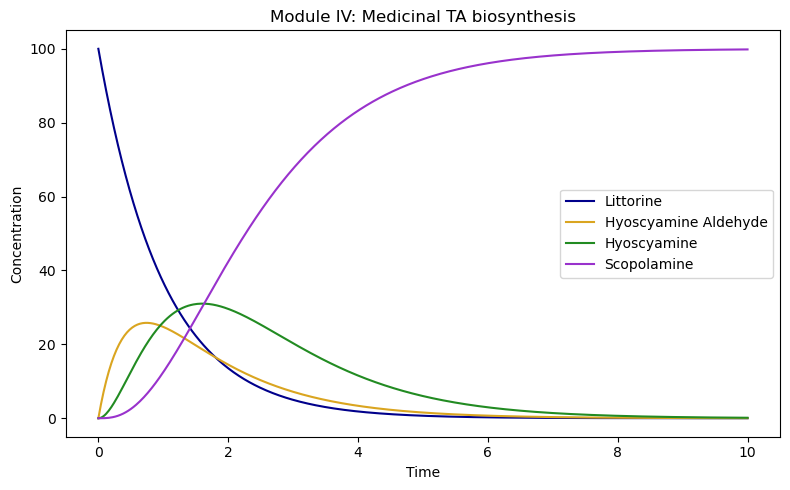

In [110]:
# Module IV: Medicinal TA biosynthesis

from biocrnpyler import Species, Reaction, ChemicalReactionNetwork, Compartment

# === Define compartments ===
cytosol = Compartment("cytosol", spatial_dimensions=3, size=1.0, initial_volume=1.0)
ER = Compartment("ER", spatial_dimensions=3, size=1.0, initial_volume=1.0)

# === Define species in compartments ===
Littorine_cyto = Species("Littorine", compartment=cytosol)
Hyoscyamine_aldehyde = Species("Hyoscyamine_aldehyde", compartment=ER)
Hyoscyamine = Species("Hyoscyamine", compartment=cytosol)
Scopolamine = Species("Scopolamine", compartment=cytosol)

# === Enzymes (not catalyzing in code, just included for context) ===
AbCYP80F1_ER = Species("AbCYP80F1", compartment=ER)
AtATR1_ER = Species("AtATR1", compartment=ER)
DsHDH = Species("DsHDH", compartment=cytosol)
DsH6H = Species("DsH6H", compartment=cytosol)

# === Define rate constants ===
k1 = 1.0  # Littorine → Hyoscyamine aldehyde
k2 = 1.0  # Hyoscyamine aldehyde → Hyoscyamine
k3 = 1.0  # Hyoscyamine → Scopolamine

# === Define reactions ===
R1 = Reaction.from_massaction([Littorine_cyto], [Hyoscyamine_aldehyde], k_forward=k1)
R1.name = "Littorine_to_HyoscyamineAldehyde"

R2 = Reaction.from_massaction([Hyoscyamine_aldehyde], [Hyoscyamine], k_forward=k2)
R2.name = "HyoscyamineAldehyde_to_Hyoscyamine"

R3 = Reaction.from_massaction([Hyoscyamine], [Scopolamine], k_forward=k3)
R3.name = "Hyoscyamine_to_Scopolamine"

# === Simulated transport between compartments ===
Transport = Reaction.from_massaction([Hyoscyamine_aldehyde], [Hyoscyamine], k_forward=1.0, k_reverse=0.2)
Transport.name = "Transport_HA_ER_to_Cytosol"

# === Build CRN ===
CRN = ChemicalReactionNetwork (
    species=[Littorine_cyto, Hyoscyamine_aldehyde, Hyoscyamine, Scopolamine, AbCYP80F1_ER, AtATR1_ER, DsHDH, DsH6H],
    reactions=[R1, R2, R3, Transport] 
    )

print(CRN)

# === Export SBML ===
CRN.write_sbml_file("tropane_pathway_compartments.xml")

# === Simulate with BioSCRAPE ===
try:
    import bioscrape
    import numpy as np
    import pylab as plt

    # Initial conditions
    x0 = {"Littorine_cytosol": 100}

    # Timepoints
    timepoints = np.linspace(0, 10, 500)

    # Simulate
    R = CRN.simulate_with_bioscrape_via_sbml( timepoints=timepoints,initial_condition_dict=x0)

    # Plot
    plt.figure(figsize=(8, 5))
    plt.plot(R["time"], R["Littorine_cytosol"], label="Littorine", color="darkblue")
    plt.plot(R["time"], R["Hyoscyamine_aldehyde_ER"], label="Hyoscyamine Aldehyde",color="goldenrod")
    plt.plot(R["time"], R["Hyoscyamine_cytosol"], label="Hyoscyamine", color= "forestgreen")
    plt.plot(R["time"], R["Scopolamine_cytosol"], label="Scopolamine",color= "darkorchid")
    plt.xlabel("Time")
    plt.ylabel("Concentration")
    plt.title("Module IV: Medicinal TA biosynthesis")
    plt.legend()
    plt.tight_layout()
    plt.show()

except ModuleNotFoundError:
    print("Plotting Modules not installed.")
    


Module 1: Arginine metabolism → Putrescine

Module 2: Putrescine → Tropine

Module 3: Phenylalanine → PLA glucoside

Module 5: PLA glucoside + Tropine → Littorine

Module 4: Littorine → Hyoscyamine → Scopolamine

Species = Glutamic_acid_cytosol, Arginine_cytosol, Ornithine_cytosol, Spermine_cytosol, Putrescine_cytosol, Agmatine_cytosol, Spermidine_cytosol, Arg2_enzyme_cytosol, AsADC_enzyme_cytosol, speB_enzyme_cytosol, Car1_enzyme_cytosol, Spe1_enzyme_cytosol, Fms1_enzyme_cytosol, N_methylputrescine_cytosol, Methylaminobutanal_cytosol, N_Methyl_pyrrolinium_cytosol, Pyrrolidinyl_oxobutanoic_acid_cytosol, Tropinone_cytosol, Tropine_cytosol, AbPMT1_DsPMT1_enzyme_cytosol, DmMPO1C_PTS1_enzyme_peroxisome, AbPYKS_enzyme_cytosol, AbCYP82M3_AtATR1_enzyme_ER, DsTR1_enzyme_cytosol, Phenylalanine_cytosol, Phenylpyruvic_acid_cytosol, Phenyllactic_acid_cytosol, Phenyllactic_acid_glucoside_cytosol, Aro_enzyme_cytosol, WfPPR_enzyme_cytosol, AbUGT_enzyme_cytosol, Phenyllactic_acid_glucoside_vacuole, Tropine_vacuole, Littorine_vacuole, NtJAT1_transporter, AbLS_DsRed_enzyme_vacuole, Littorine_cytosol, Hyoscyamine_aldehyde_ER, Hyoscyamine_cytosol, Scopolamine_cytosol, AbCYP80F1_ER, AtATR1_ER, DsHDH_cytosol, DsH6H_

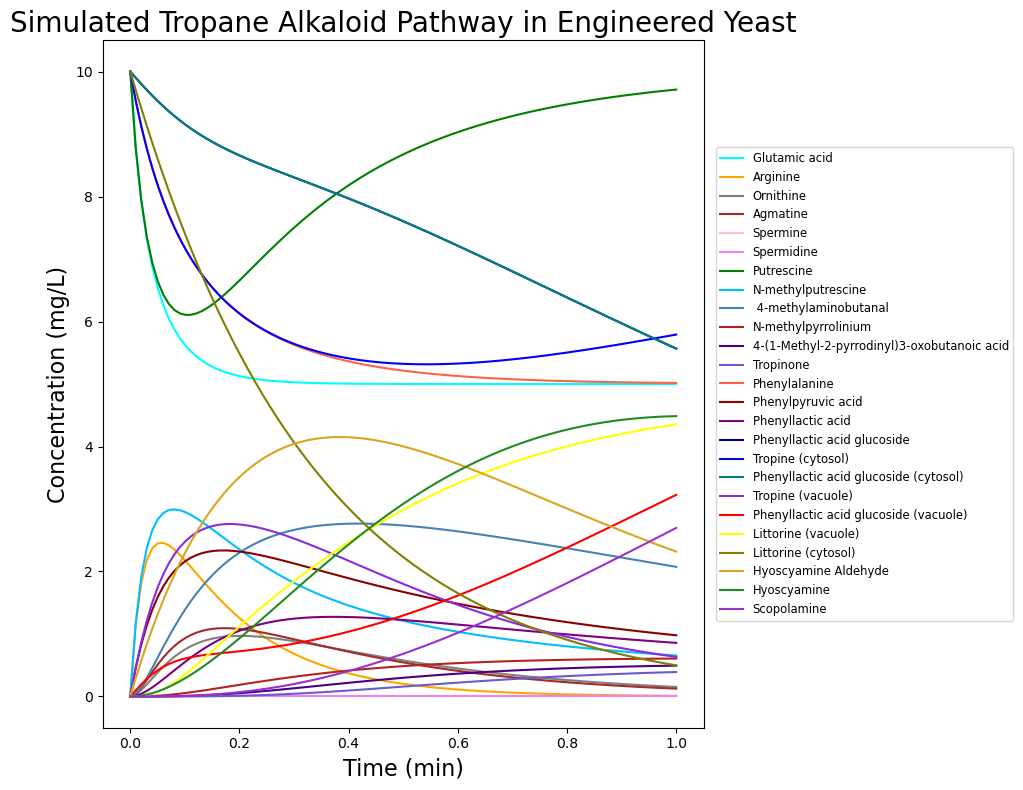

In [111]:
from biocrnpyler import *
# Define compartments

cytosol = Compartment("cytosol")
ER = Compartment("ER")
peroxisome = Compartment("peroxisome")
vacuole = Compartment("vacuole")

# === Module 1 ===
# Species
A = Species("Glutamic_acid", compartment=cytosol)
B = Species("Arginine", compartment=cytosol)
C = Species("Ornithine", compartment=cytosol)
D = Species("Spermine", compartment=cytosol)
E = Species("Putrescine", compartment=cytosol)
F = Species("Agmatine", compartment=cytosol)
G = Species("Spermidine", compartment=cytosol)


# Enzymes
Arg2 = Species("Arg2_enzyme", compartment=cytosol)
AsADC = Species("AsADC_enzyme", compartment=cytosol)
speB = Species("speB_enzyme", compartment=cytosol)
Car1 = Species("Car1_enzyme", compartment=cytosol)
Spe1 = Species("Spe1_enzyme", compartment=cytosol)
Fms1 = Species("Fms1_enzyme", compartment=cytosol)


# Rates
k1 = 3.0
k2 = 1.4
k3 = 1.0
k4 = 1.0


# Reactions
R1_module1 = Reaction.from_massaction([A, Arg2], [B], k_forward=k1)
R2_module1 = Reaction.from_massaction([B, AsADC], [F], k_forward=k2)
R3_module1 = Reaction.from_massaction([F, speB], [E], k_forward=k2)
R4_module1 = Reaction.from_massaction([B, Car1], [C], k_forward=k3)
R5_module1 = Reaction.from_massaction([C, Spe1], [E], k_forward=k3)
R6_module1 = Reaction.from_massaction([D, Fms1], [G], k_forward=k4)
R7_module1 = Reaction.from_massaction([G, Fms1], [E], k_forward=k4)


# === Module 2 ===

#Species
AA = E  # Putrescine reused from Module 1
BB = Species("N_methylputrescine", compartment=cytosol)
CC = Species("Methylaminobutanal", compartment=cytosol)
DD = Species("N_Methyl_pyrrolinium", compartment=cytosol)
EE = Species("Pyrrolidinyl_oxobutanoic_acid", compartment=cytosol)
FF = Species("Tropinone", compartment=cytosol)
GG = Species("Tropine", compartment=cytosol)

#Enzymes
AbPMT1_DsPMT1 = Species("AbPMT1_DsPMT1_enzyme", compartment=cytosol)
DmMPO1C = Species("DmMPO1C_PTS1_enzyme", compartment=peroxisome)
AbPYKS = Species("AbPYKS_enzyme", compartment=cytosol)
AbCYP82M3_AtATR1 = Species("AbCYP82M3_AtATR1_enzyme", compartment=ER)
DsTR1 = Species("DsTR1_enzyme", compartment=cytosol)

   

#Rates
k1 = 3.0
k2 = 1.4
k3 = 1.0
k4 = 1.0
k5 = 1.0
k6=  1.0

#Reactions
R1_module2 = Reaction.from_massaction([AA, AbPMT1_DsPMT1], [BB], k_forward=k1)
R2_module2 = Reaction.from_massaction([BB, DmMPO1C], [CC], k_forward=k2)
R3_module2 = Reaction.from_massaction([CC], [DD], k_forward=k3)
R4_module2 = Reaction.from_massaction([DD, AbPYKS], [EE], k_forward=k4)
R5_module2 = Reaction.from_massaction([EE, AbCYP82M3_AtATR1], [FF], k_forward=k5)
R6_module2 = Reaction.from_massaction([FF, DsTR1], [GG], k_forward=k6)


# === Module 3: Phenyllactic Acid Glucoside (Corrected with cytosol compartment) ===
#Species
Phe = Species("Phenylalanine", compartment=cytosol)
PPA = Species("Phenylpyruvic_acid", compartment=cytosol)
PLA = Species("Phenyllactic_acid", compartment=cytosol)
PLA_glucoside = Species("Phenyllactic_acid_glucoside", compartment=cytosol)

#Enzymes
Aro = Species("Aro_enzyme", compartment=cytosol)
WfPPR = Species("WfPPR_enzyme", compartment=cytosol)
AbUGT = Species("AbUGT_enzyme", compartment=cytosol)

#Reactions
R1_module3 = Reaction.from_massaction([Phe, Aro], [PPA], k_forward=1.0)
R2_module3 = Reaction.from_massaction([PPA, WfPPR], [PLA], k_forward=1.0)
R3_module3 = Reaction.from_massaction([PLA, AbUGT], [PLA_glucoside], k_forward=1.0)



# === Module 5 ===

# === Define Vacuole Compartment (if not already defined) ===
vacuole = Compartment("vacuole")
#Species
Tropine_cyto = GG  # Reuse Tropine from Module 2 (cytosol)
Phenyllactic_acid_glucoside_cyto = PLA_glucoside
PLA_glucoside_vacu = Species("Phenyllactic_acid_glucoside", compartment=vacuole)
Tropine_vacu = Species("Tropine", compartment=vacuole)
Littorine_vacu = Species("Littorine", compartment=vacuole)

# Enzymes (assumed cytosolic unless stated otherwise)
NtJAT1 = Species("NtJAT1_transporter")
AbLS_DsRed = Species("AbLS_DsRed_enzyme", compartment=vacuole)

# Reactions
R1_module5 = Reaction.from_massaction([Tropine_cyto, NtJAT1], [Tropine_vacu], k_forward=1.0)
R2_module5 = Reaction.from_massaction([Phenyllactic_acid_glucoside_cyto], [PLA_glucoside_vacu], k_forward=1.0)
R3_module5 = Reaction.from_massaction([PLA_glucoside_vacu, Tropine_vacu, AbLS_DsRed], [Littorine_vacu], k_forward=1.0)

# === Module 4 ===


#Species
Littorine_cyto= Species ("Littorine", compartment= cytosol)
Hyoscyamine_aldehyde = Species("Hyoscyamine_aldehyde", compartment=ER)
Hyoscyamine = Species("Hyoscyamine", compartment=cytosol)
Scopolamine = Species("Scopolamine", compartment=cytosol)



#Enzymes
AbCYP80F1_ER = Species("AbCYP80F1", compartment=ER)
AtATR1_ER = Species("AtATR1", compartment=ER)
DsHDH = Species("DsHDH", compartment=cytosol)
DsH6H = Species("DsH6H", compartment=cytosol)


#Reactions
# === Define reactions ===
R1 = Reaction.from_massaction([Littorine_cyto], [Hyoscyamine_aldehyde], k_forward=k1)
R1.name = "Littorine_to_HyoscyamineAldehyde"


R2 = Reaction.from_massaction([Hyoscyamine_aldehyde], [Hyoscyamine], k_forward=k2)
R2.name = "HyoscyamineAldehyde_to_Hyoscyamine"


R3 = Reaction.from_massaction([Hyoscyamine], [Scopolamine], k_forward=k3)
R3.name = "Hyoscyamine_to_Scopolamine"


# === Simulated transport between compartments ===
Transport = Reaction.from_massaction([Hyoscyamine_aldehyde], [Hyoscyamine], k_forward=1.0, k_reverse=0.2)
Transport.name = "Transport_HA_ER_to_Cytosol"


#CRN


CRN = ChemicalReactionNetwork(species=[
#module 1
A, B, C, D, E, F, G, Arg2, AsADC, speB, Car1, Spe1, Fms1,
#module 2
AA, BB, CC, DD, EE, FF, GG, AbPMT1_DsPMT1, DmMPO1C, AbPYKS, AbCYP82M3_AtATR1, DsTR1,
#module 3
Phe, PPA, PLA, PLA_glucoside, Aro, WfPPR, AbUGT,
#module 5
Tropine_cyto, Phenyllactic_acid_glucoside_cyto, PLA_glucoside_vacu,Tropine_vacu,Littorine_vacu, NtJAT1, AbLS_DsRed,
#module 4
Littorine_cyto, Hyoscyamine_aldehyde, Hyoscyamine, Scopolamine,AbCYP80F1_ER, AtATR1_ER, DsHDH, DsH6H],
reactions=[
#module 1
R1_module1, R2_module1, R3_module1, R4_module1, R5_module1, R6_module1, R7_module1,
#module 2
R1_module2, R2_module2, R3_module2, R4_module2, R5_module2, R6_module2,
#module 3
R1_module3, R2_module3, R3_module3,
#module 5
R1_module5, R2_module5, R3_module5,
#Module 4
R1, R2, R3, Transport])

print(CRN)
CRN.write_sbml_file("combined_model.xml")
# Simulate and plot
try:
    import bioscrape
    import numpy as np
    import pylab as plt
    import pandas as pd


    # Correct initial conditions


    x0 = {
        #module 1
        "Glutamic_acid_cytosol": 10,
        "Arginine_cytosol": 0,
        "Ornithine_cytosol": 0,
        "Spermine_cytosol": 0,
        "Putrescine_cytosol": 10,
        "Agmatine_cytosol": 0,
        "Spermidine_cytosol": 0,
        "Arg2_enzyme_cytosol": 5,
        "AsADC_enzyme_cytosol": 5,
        "speB_enzyme_cytosol": 5,
        "Car1_enzyme_cytosol": 5,
        "Spe1_enzyme_cytosol": 5,
        "Fms1_enzyme_cytosol": 5,
        #Module 2
        "Putrescine_cytosol": 10,
        "N_methylputrescine_cytosol": 0,
        "Methylaminobutanal_cytosol": 0,
        "N_Methyl_pyrrolinium_cytosol": 0,
        "Pyrrolidinyl_oxobutanoic_acid_cytosol": 0,
        "Tropinone_cytosol": 0,
        "Tropine_cytosol": 10,
        "AbPMT1_DsPMT1_enzyme_cytosol": 5,
        "DmMPO1C_PTS1_enzyme_peroxisome": 5,
        "AbPYKS_enzyme_cytosol": 5,
        "AbCYP82M3_AtATR1_enzyme_ER": 5,
        "DsTR1_enzyme_cytosol": 5,
        #Module 3
        "Phenylalanine_cytosol": 10,
        "Phenylpyruvic_acid_cytosol": 0,
        "Phenyllactic_acid_cytosol": 0,
        "Phenyllactic_acid_glucoside_cytosol": 10,
        "Aro_enzyme_cytosol": 5,
        "WfPPR_enzyme_cytosol": 5,
        "AbUGT_enzyme_cytosol": 5,
        #module 5
        "Tropine_vacuole":0,
        "Phenyllactic_acid_glucoside_vacuole": 0,
        "Littorine_vacuole": 0,
        "NtJAT1_transporter": 5,
        "AbLS_DsRed_enzyme_vacuole": 5,
        #module 4
        "Littorine_cytosol" :10,
        "Hyoscyamine_aldehyde_ER":0,
        "Hyoscyamine_cytosol":0,
        "Scopolamine_cytosol": 0,
        "AbCYP80F1_ER":5,
        "AtATR1_ER":5,
        "DsHDH_cytosol":5,
        "DsH6H_cytosol":5,

        }




    timepoints = np.linspace(0, 1, 100)


    # Run the simulation
    R = CRN.simulate_with_bioscrape_via_sbml(timepoints=timepoints, initial_condition_dict=x0)


    # Plot results
    plt.figure(figsize=(10, 8))
    #Module 1
    plt.plot (R['time'], R["Glutamic_acid_cytosol"], label="Glutamic acid", color= "cyan")
    plt.plot(R['time'], R["Arginine_cytosol"], label="Arginine", color ="orange")
    plt.plot(R['time'], R["Ornithine_cytosol"], label="Ornithine", color="gray")
    plt.plot(R['time'], R["Agmatine_cytosol"], label="Agmatine", color= "brown")
    plt.plot(R['time'], R["Spermine_cytosol"], label="Spermine", color="Pink")
    plt.plot(R['time'], R["Spermidine_cytosol"], label="Spermidine", color= "violet") 
    plt.plot(R['time'], R["Putrescine_cytosol"], label="Putrescine", color= "green")
    
    #Module 2
    plt.plot(R["time"], R["N_methylputrescine_cytosol"], label="N-methylputrescine",color="deepskyblue" )
    plt.plot(R["time"], R["Methylaminobutanal_cytosol"], label=" 4-methylaminobutanal", color="steelblue")
    plt.plot(R["time"], R["N_Methyl_pyrrolinium_cytosol"], label="N-methylpyrrolinium", color= "firebrick")
    plt.plot(R["time"], R["Pyrrolidinyl_oxobutanoic_acid_cytosol"], label="4-(1-Methyl-2-pyrrodinyl)3-oxobutanoic acid", color="indigo")
    plt.plot(R["time"], R["Tropinone_cytosol"], label="Tropinone", color="slateblue")
    
    #Module 3
    plt.plot(R['time'], R["Phenylalanine_cytosol"], label="Phenylalanine", color="tomato")
    plt.plot(R['time'], R["Phenylpyruvic_acid_cytosol"], label="Phenylpyruvic acid", color= "darkred")
    plt.plot(R['time'], R["Phenyllactic_acid_cytosol"], label="Phenyllactic acid", color="purple")
    plt.plot(R['time'], R["Phenyllactic_acid_glucoside_cytosol"], label="Phenyllactic acid glucoside", color= "Navy")
   
    # Module 5
    plt.plot(R['time'], R["Tropine_cytosol"], label="Tropine (cytosol)",color='blue')
    plt.plot(R['time'], R["Phenyllactic_acid_glucoside_cytosol"], label="Phenyllactic acid glucoside (cytosol)", color='teal')
    plt.plot(R['time'], R["Tropine_vacuole"], label="Tropine (vacuole)", color='blueviolet')
    plt.plot(R['time'], R["Phenyllactic_acid_glucoside_vacuole"], label="Phenyllactic acid glucoside (vacuole)",color='red')
    plt.plot(R['time'], R["Littorine_vacuole"], label="Littorine (vacuole)", color='yellow')
    #Module 4
    plt.plot(R["time"],R["Littorine_cytosol"], label="Littorine (cytosol)", color="olive")
    plt.plot(R["time"],R["Hyoscyamine_aldehyde_ER"], label="Hyoscyamine Aldehyde", color="goldenrod")
    plt.plot(R["time"],R["Hyoscyamine_cytosol"], label="Hyoscyamine", color= "forestgreen")
    plt.plot(R ["time"],R["Scopolamine_cytosol"], label="Scopolamine", color= "darkorchid")
    plt.xlabel("Time (min)", fontsize=16)
    plt.ylabel("Concentration (mg/L)", fontsize=16)
    plt.legend(fontsize=14)
    plt.title("Simulated Tropane Alkaloid Pathway in Engineered Yeast", fontsize=20)
    plt.legend(loc='center left', bbox_to_anchor=(1.02, 0.5), fontsize='small', borderaxespad=0.)
    plt.tight_layout()
    plt.show()

   
except ModuleNotFoundError:
    print("Plotting Modules not installed.")